In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### plotting the difference between scaling and log scaling

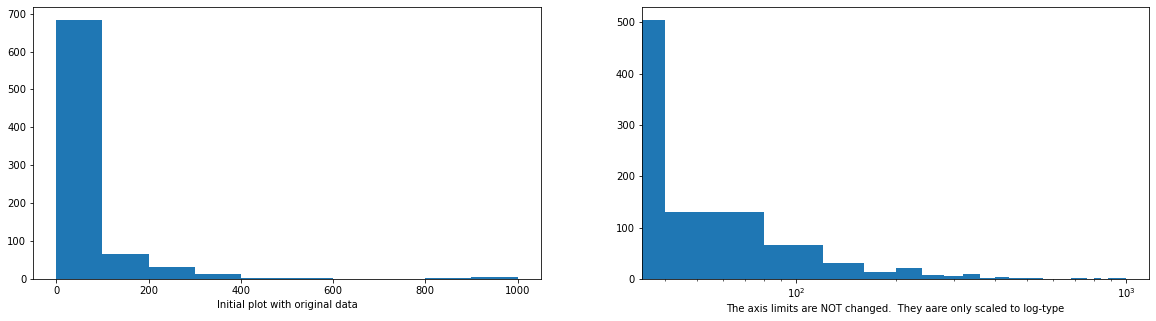

In [2]:
plt.figure(figsize = [20,5])

#histogram on the left: full data without scaling
plt.subplot(1,2,1)
plt.hist(data=pokemon, x = 'weight');
#display a label on the x-axis
plt.xlabel('Initial plot with original data')

#histogram on the right: scaled using plt.xscale('log')
plt.subplot(1,2,2)
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

#The argument in the xscale() represents the axis scale type to apply.
# the possible values are : {"linear", "log", "symlog", "logit", ...}
# Refer - - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The axis limits are NOT changed.  They aare only scaled to log-type');

In [3]:
#describing the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [4]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

#### scale the x-axis to log-type and change axis limit

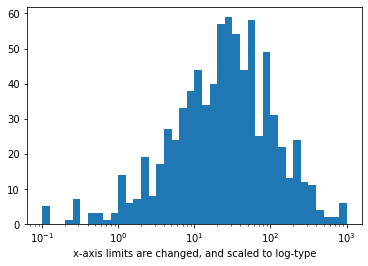

In [6]:
#axis transformation
#bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

#the argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

plt.xlabel('x-axis limits are changed, and scaled to log-type');

#### scale the x-axis to log type, change the axis limits, and increase the x-ticks

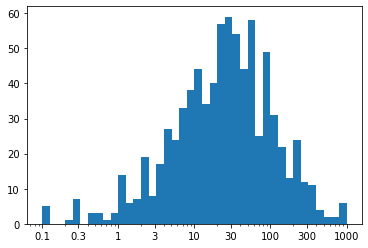

In [8]:
# get the ticks for bins between [0 - maximum weight]
bins = 10** np.arange(-1, 3+0.1, 0.1)

#generage the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
#convert ticks into string values, to be displayed along the d-axis
labels = ['{}'.format(v) for v in ticks]

#plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);
#scaling
plt.xscale('log')
#it is important that xticks are specified after xscale as xscale has its own tick function that we need to override
plt.xticks(ticks, labels);

## Feature engineering for custom scaling
If we want to use a different transformation that's not available in xscale then you'll have to perform some feature engineering.  In cases like this we want to be systematic by writing a function that applies both the transformation and its inverse.  The inverse will be useful in cases where we specifiy the values in their transfomred units and need to get back the natural units back.

example below is feature engineering to get a square root scale transformation

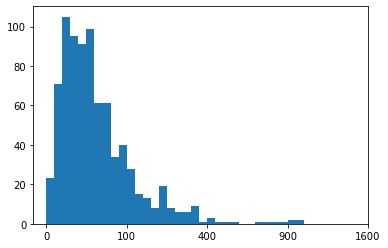

In [12]:
def sqrt_trans(x, inverse = False):
    """transformation helper function"""
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

#bin resizing to transform the axis
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

#plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins=bin_edges)

#identify the tick locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

#apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));